## EELS - Overview

Eines der beiden Diagramme wird in meiner Dissertation bei der Einführung von EELS verwendet.
Es handelt sich um zusammengesetzte Spektren, die von eine Querschnittsprobe eines Eisen-Chrom-Schichtsystems aufgenommen wurden.

Das zweite Diagramm soll veranschaulichen, was man unter einem Energiefenster versteht. Dazu wird am Beispiel der L_2,3-Kante von Eisen die Nutzung eines 20 eV breiten Energiefensters demonstriert. 

### Die Daten

Es werden zwei verschiedene Spektren geladen (``df1`` und ``df2``). Genutzt wird nur eines der beiden, dies ist ``df2``.

In [1]:
import pandas as pd
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
%matplotlib inline

df1 = pd.read_csv('data/EELS-Overview-FeCr_1.csv')
df2 = pd.read_csv('data/EELS-Overview-FeCr_2.csv')

In [2]:
df1.head()

,X,Y
0,-99.838,2163.001
1,-99.740,2163.001
2,-99.643,2163.001
3,-99.545,2163.001
4,-99.448,2161.463


In [3]:
df2.head()

,X,Y
0,-5.070,2479.255
1,-4.972,2696.758
2,-4.875,2703.062
3,-4.777,2981.175
4,-4.680,3122.648


Der ZLP liegt bei -0.195 eV.


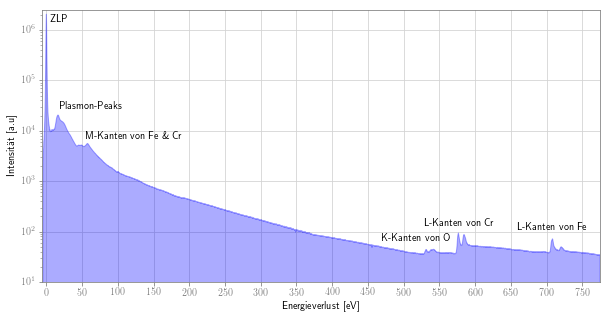

Das Maximum des Spektrum ist 60917 mal größer als das Minimum.


In [4]:
def plot_EELS(data_frame):
    
    print('Der ZLP liegt bei %.3f eV.' % data_frame.X[np.argmax(data_frame.Y)])
    # Shift 0eV to where the intensity is the highest:
    x_offset = data_frame.X[np.argmax(data_frame.Y)]
    data_frame.X = data_frame.X - x_offset
    plt.figure(figsize=(10,5))
    plt.fill_between(data_frame.X, 0, data_frame.Y, color='blue', alpha=0.33)
    plt.xlabel('Energieverlust [eV]')
    plt.ylabel('Intensität [a.u]')
    plt.yscale('log')
    plt.xlim(-6, data_frame.X.max())
    plt.ylim(1e1, round(1.2 * data_frame.Y.max()))
    
    fs = 10
    plt.text(5,
             2e6,
             'ZLP',
             verticalalignment='top',
             horizontalalignment='left',
             fontsize=fs
            )  
    plt.text(17,
             2.5e4,
             'Plasmon-Peaks',
             verticalalignment='bottom',
             horizontalalignment='left',
             fontsize=fs
            )    
    plt.text(55,
             0.95e4,
             'M-Kanten von Fe \& Cr',
             verticalalignment='top',
             horizontalalignment='left',
             fontsize=fs
            )    
    plt.text(565,
             90,
             'K-Kanten von O',
             verticalalignment='top',
             horizontalalignment='right',
             fontsize=fs
            )    
    plt.text(578,
             120,
             'L-Kanten von Cr',
             verticalalignment='bottom',
             horizontalalignment='center',
             fontsize=fs
            )    
    plt.text(708,
             100,
             'L-Kanten von Fe',
             verticalalignment='bottom',
             horizontalalignment='center',
             fontsize=fs
            )
    
    plt.xticks(range(0, 751, 50))
    plt.savefig('Bilder/EELS_Overview')
    plt.show()

plot_EELS(df2)
print('Das Maximum des Spektrum ist %d mal größer als das Minimum.' % int(round(df2.Y.max() / df2.Y.min())))

Potenzfunktion: I(E) = 3.486 * E**-2.096


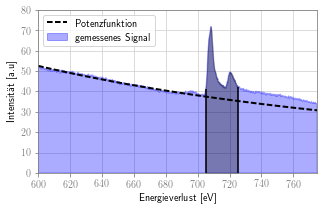

In [5]:
def power(x, a, r):
    return 10e6*a*x**r

def fit_power(data_frame, start, stop):
    filtered = data_frame.loc[data_frame.X > start].loc[data_frame.X < stop]
    xs = filtered.X
    ys = filtered.Y
    popt, pcov = scipy.optimize.curve_fit(power, xs, ys, p0=(1, 1))
    print('Potenzfunktion: I(E) = %.3f * E**%.3f' % tuple(popt))
    return popt


def plot_EELS_Kanten(data_frame):
    # Shift 0eV to where the intensity is the highest:
    x_offset = data_frame.X[np.argmax(data_frame.Y)]
    data_frame.X = data_frame.X - x_offset
    plt.figure(figsize=(5,3))
    
    plt.fill_between(data_frame.X, 0, data_frame.Y, label='gemessenes Signal', color='blue', alpha=0.33)
    
    filtered = data_frame.loc[data_frame.X >= 705].loc[data_frame.X <= 725]
    plt.fill_between(filtered.X, 0, filtered.Y, label='', color='black', alpha=0.3)
    plt.vlines(705, 0, filtered.Y[abs(filtered.X - 705) < 0.01])
    plt.vlines(725, 0, filtered.Y[abs(filtered.X - 725) < 0.01])
    
    x_fit = np.linspace(600, data_frame.X.max(), 100)
    a, r = fit_power(data_frame, 600, 680)
    plt.plot(x_fit, power(x_fit, a, r), '--', color='black', lw=2, label='Potenzfunktion')
    
    plt.xlabel('Energieverlust [eV]')
    plt.ylabel('Intensität [a.u]')
    plt.xlim(600, data_frame.X.max())
    ymin, ymax = plt.ylim()
    plt.ylim(0, 80)
    
    plt.legend(loc=2)
    
    plt.savefig('Bilder/EELS_L-Kanten')
    plt.show()

plot_EELS_Kanten(df2)